In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("train.csv",usecols=[
    "MSZoning",
    "LotArea",
    "Alley",
    "Neighborhood",
    "HouseStyle",
    "OverallQual",
    "MasVnrType",
    "ExterQual",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "BsmtFullBath",
    "FullBath",
    "KitchenAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageType",
    "GarageArea",
    "PoolArea",
    "Fence",
    "YrSold",
    "YearRemodAdd",
    "SalePrice"
])
pd.set_option('display.max_columns', None)

In [3]:
test_df=pd.read_csv("test.csv",usecols=[
    "MSZoning",
    "LotArea",
    "Alley",
    "Neighborhood",
    "HouseStyle",
    "OverallQual",
    "MasVnrType",
    "ExterQual",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "BsmtFullBath",
    "FullBath",
    "KitchenAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageType",
    "GarageArea",
    "PoolArea",
    "Fence",
    "YrSold",
    "YearRemodAdd"
])
pd.set_option('display.max_columns', None)

In [4]:
train_df.shape

(1460, 25)

In [5]:
test_df.shape

(1459, 24)

In [6]:
train_df.head()

,MSZoning,LotArea,Alley,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,YrSold,SalePrice
0,RL,8450,NaN,CollgCr,2Story,7,2003,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,2,1,Gd,8,0,Attchd,548,0,NaN,2008,208500
1,RL,9600,NaN,Veenker,1Story,6,1976,NaN,TA,GasA,Ex,Y,SBrkr,0,2,1,TA,6,1,Attchd,460,0,NaN,2007,181500
2,RL,11250,NaN,CollgCr,2Story,7,2002,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,2,1,Gd,6,1,Attchd,608,0,NaN,2008,223500
3,RL,9550,NaN,Crawfor,2Story,7,1970,NaN,TA,GasA,Gd,Y,SBrkr,1,1,1,Gd,7,1,Detchd,642,0,NaN,2006,140000
4,RL,14260,NaN,NoRidge,2Story,8,2000,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,2,1,Gd,9,1,Attchd,836,0,NaN,2008,250000


In [7]:
train_df.sample(5)

,MSZoning,LotArea,Alley,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,YrSold,SalePrice
1266,RM,10120,NaN,OldTown,2.5Unf,7,1950,NaN,Fa,GasA,TA,N,FuseF,0,1,2,TA,9,1,Detchd,308,0,MnPrv,2007,122000
248,RL,11317,NaN,CollgCr,2Story,7,2003,BrkFace,Gd,GasA,Ex,Y,SBrkr,0,2,1,Gd,8,0,Attchd,500,0,NaN,2007,180000
72,RL,10141,NaN,Gilbert,2Story,7,1998,BrkFace,TA,GasA,Gd,Y,SBrkr,0,2,1,TA,7,1,Attchd,427,0,NaN,2009,185000
1130,RL,7804,NaN,SWISU,1.5Fin,4,1950,NaN,TA,GasA,TA,Y,SBrkr,1,2,1,Gd,7,2,Detchd,576,0,MnPrv,2009,135000
715,RL,10140,NaN,NWAmes,1Story,6,1974,BrkFace,TA,GasA,TA,Y,SBrkr,0,2,1,TA,7,1,Attchd,478,0,MnPrv,2009,165000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotArea       1460 non-null   int64 
 2   Alley         91 non-null     object
 3   Neighborhood  1460 non-null   object
 4   HouseStyle    1460 non-null   object
 5   OverallQual   1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   MasVnrType    588 non-null    object
 8   ExterQual     1460 non-null   object
 9   Heating       1460 non-null   object
 10  HeatingQC     1460 non-null   object
 11  CentralAir    1460 non-null   object
 12  Electrical    1459 non-null   object
 13  BsmtFullBath  1460 non-null   int64 
 14  FullBath      1460 non-null   int64 
 15  KitchenAbvGr  1460 non-null   int64 
 16  KitchenQual   1460 non-null   object
 17  TotRmsAbvGrd  1460 non-null   int64 
 18  Fireplaces    1460 non-null   int64 
 19  Garage

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotArea       1459 non-null   int64  
 2   Alley         107 non-null    object 
 3   Neighborhood  1459 non-null   object 
 4   HouseStyle    1459 non-null   object 
 5   OverallQual   1459 non-null   int64  
 6   YearRemodAdd  1459 non-null   int64  
 7   MasVnrType    565 non-null    object 
 8   ExterQual     1459 non-null   object 
 9   Heating       1459 non-null   object 
 10  HeatingQC     1459 non-null   object 
 11  CentralAir    1459 non-null   object 
 12  Electrical    1459 non-null   object 
 13  BsmtFullBath  1457 non-null   float64
 14  FullBath      1459 non-null   int64  
 15  KitchenAbvGr  1459 non-null   int64  
 16  KitchenQual   1458 non-null   object 
 17  TotRmsAbvGrd  1459 non-null   int64  
 18  Fireplaces    1459 non-null 

In [10]:
train_df.describe()

,LotArea,OverallQual,YearRemodAdd,BsmtFullBath,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1984.865753,0.425342,1.565068,1.046575,6.517808,0.613014,472.980137,2.758904,2007.815753,180921.195890
std,9981.264932,1.382997,20.645407,0.518911,0.550916,0.220338,1.625393,0.644666,213.804841,40.177307,1.328095,79442.502883
min,1300.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7553.500000,5.000000,1967.000000,0.000000,1.000000,1.000000,5.000000,0.000000,334.500000,0.000000,2007.000000,129975.000000
50%,9478.500000,6.000000,1994.000000,0.000000,2.000000,1.000000,6.000000,1.000000,480.000000,0.000000,2008.000000,163000.000000
75%,11601.500000,7.000000,2004.000000,1.000000,2.000000,1.000000,7.000000,1.000000,576.000000,0.000000,2009.000000,214000.000000
max,215245.000000,10.000000,2010.000000,3.000000,3.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,2010.000000,755000.000000


In [11]:
train_df.isnull().sum()

MSZoning           0
LotArea            0
Alley           1369
Neighborhood       0
HouseStyle         0
OverallQual        0
YearRemodAdd       0
MasVnrType       872
ExterQual          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
BsmtFullBath       0
FullBath           0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType        81
GarageArea         0
PoolArea           0
Fence           1179
YrSold             0
SalePrice          0
dtype: int64

In [12]:
test_df.isnull().sum()

MSZoning           4
LotArea            0
Alley           1352
Neighborhood       0
HouseStyle         0
OverallQual        0
YearRemodAdd       0
MasVnrType       894
ExterQual          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
BsmtFullBath       2
FullBath           0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Fireplaces         0
GarageType        76
GarageArea         1
PoolArea           0
Fence           1169
YrSold             0
dtype: int64

In [13]:
train_df['Alley'].value_counts()
test_df['Alley'].value_counts()

Alley
Grvl    70
Pave    37
Name: count, dtype: int64

In [14]:
train_df['Alley'].sample()

175    NaN
Name: Alley, dtype: object

In [15]:
pd.api.types.is_numeric_dtype(train_df["Alley"])       
pd.api.types.is_numeric_dtype(test_df["Alley"])  

False

In [22]:
cols = ['Alley', 'MasVnrType', 'Fence','GarageType','Electrical']
for col in cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [27]:
cols1 = ['Alley', 'MasVnrType', 'Fence','GarageType','BsmtFullBath','KitchenQual','MSZoning']
for col in cols1:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_21572\3537749154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)


In [28]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [29]:
test_df.isnull().sum()

MSZoning        0
LotArea         0
Alley           0
Neighborhood    0
HouseStyle      0
OverallQual     0
YearRemodAdd    0
MasVnrType      0
ExterQual       0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
BsmtFullBath    0
FullBath        0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageArea      0
PoolArea        0
Fence           0
YrSold          0
dtype: int64

In [30]:
# train_df.dropna(subset=['Electrical'],inplace=True)

In [31]:
# test_df.dropna(subset=['BsmtFullBath'],inplace=True)

In [32]:
# test_df.dropna(subset=['KitchenQual'],inplace=True)

In [33]:
# test_df.dropna(subset=['GarageArea'],inplace=True)

In [34]:
# test_df.dropna(subset=['MSZoning'],inplace=True)

In [35]:
test_df['BsmtFullBath']=test_df['BsmtFullBath'].astype(int)
test_df['GarageArea']=test_df['GarageArea'].astype(int)

In [36]:
test_df.isnull().sum()

MSZoning        0
LotArea         0
Alley           0
Neighborhood    0
HouseStyle      0
OverallQual     0
YearRemodAdd    0
MasVnrType      0
ExterQual       0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
BsmtFullBath    0
FullBath        0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageArea      0
PoolArea        0
Fence           0
YrSold          0
dtype: int64

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1459 non-null   object
 1   LotArea       1459 non-null   int64 
 2   Alley         1459 non-null   object
 3   Neighborhood  1459 non-null   object
 4   HouseStyle    1459 non-null   object
 5   OverallQual   1459 non-null   int64 
 6   YearRemodAdd  1459 non-null   int64 
 7   MasVnrType    1459 non-null   object
 8   ExterQual     1459 non-null   object
 9   Heating       1459 non-null   object
 10  HeatingQC     1459 non-null   object
 11  CentralAir    1459 non-null   object
 12  Electrical    1459 non-null   object
 13  BsmtFullBath  1459 non-null   int64 
 14  FullBath      1459 non-null   int64 
 15  KitchenAbvGr  1459 non-null   int64 
 16  KitchenQual   1459 non-null   object
 17  TotRmsAbvGrd  1459 non-null   int64 
 18  Fireplaces    1459 non-null   int64 
 19  Garage

In [38]:
train_df.isnull().sum().sum()

np.int64(0)

In [39]:
test_df.isnull().sum().sum()

np.int64(0)

In [40]:
test_df.sample(2)

,MSZoning,LotArea,Alley,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,FullBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,YrSold
962,RL,14190,Grvl,OldTown,1.5Fin,4,2006,BrkFace,Gd,GasA,Gd,Y,SBrkr,0,2,1,TA,7,0,Attchd,0,0,MnPrv,2007
331,RL,10143,Grvl,NAmes,1Story,6,1963,BrkFace,TA,GasA,Fa,Y,SBrkr,0,1,1,TA,6,0,Attchd,364,0,GdWo,2009


In [41]:
train_df['TotalBath'] = train_df['BsmtFullBath'] + train_df['FullBath']

In [42]:
test_df['TotalBath'] = test_df['BsmtFullBath'] + test_df['FullBath']

In [43]:
train_df['Quality_and_Size'] = train_df['OverallQual'] * train_df['LotArea']

In [44]:
test_df['Quality_and_Size'] = test_df['OverallQual'] * test_df['LotArea']

In [45]:
train_df['House_Age'] = train_df['YrSold'] - train_df['YearRemodAdd']

In [46]:
test_df['House_Age'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [47]:
train_df.drop(['BsmtFullBath','FullBath','OverallQual','LotArea','YrSold','YearRemodAdd'],axis=1,inplace=True)

In [48]:
test_df.drop(['BsmtFullBath','FullBath','OverallQual','LotArea','YrSold','YearRemodAdd'],axis=1,inplace=True)

In [49]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,SalePrice,TotalBath,Quality_and_Size,House_Age
1177,RM,Grvl,OldTown,1.5Fin,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,5,0,Detchd,210,0,MnPrv,115000,1,23700,5
263,RM,Grvl,OldTown,1.5Fin,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,6,0,Detchd,484,0,MnPrv,130000,2,27500,9
959,FV,Grvl,Somerst,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,6,0,Detchd,484,0,MnPrv,155000,3,18004,11


In [50]:
# Get a list of all column names
cols = list(train_df.columns)

# Remove 'SalePrice' from its current position
cols.remove('SalePrice')

# Add 'SalePrice' to the end of the list
cols.append('SalePrice')

# Reorder the DataFrame columns
train_df = train_df[cols]

# Verify the new order
print(train_df.columns)

Index(['MSZoning', 'Alley', 'Neighborhood', 'HouseStyle', 'MasVnrType',
       'ExterQual', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageArea', 'PoolArea', 'Fence', 'TotalBath',
       'Quality_and_Size', 'House_Age', 'SalePrice'],
      dtype='object')


In [51]:
train_df

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
0,RL,Grvl,CollgCr,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,8,0,Attchd,548,0,MnPrv,3,59150,5,208500
1,RL,Grvl,Veenker,1Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,TA,6,1,Attchd,460,0,MnPrv,2,57600,31,181500
2,RL,Grvl,CollgCr,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,6,1,Attchd,608,0,MnPrv,3,78750,6,223500
3,RL,Grvl,Crawfor,2Story,BrkFace,TA,GasA,Gd,Y,SBrkr,1,Gd,7,1,Detchd,642,0,MnPrv,2,66850,36,140000
4,RL,Grvl,NoRidge,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,9,1,Attchd,836,0,MnPrv,3,114080,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Grvl,Gilbert,2Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,TA,7,1,Attchd,460,0,MnPrv,2,47502,7,175000
1456,RL,Grvl,NWAmes,1Story,Stone,TA,GasA,TA,Y,SBrkr,1,TA,7,2,Attchd,500,0,MnPrv,3,79050,22,210000
1457,RL,Grvl,Crawfor,2Story,BrkFace,Ex,GasA,Ex,Y,SBrkr,1,Gd,9,2,Attchd,252,0,GdPrv,2,63294,4,266500
1458,RL,Grvl,NAmes,1Story,BrkFace,TA,GasA,Gd,Y,FuseA,1,Gd,5,0,Attchd,240,0,MnPrv,2,48585,14,142125


In [248]:
train_df['MSZoning'].value_counts()

MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [53]:
test_df.shape

(1459, 21)

<Axes: xlabel='MSZoning', ylabel='count'>

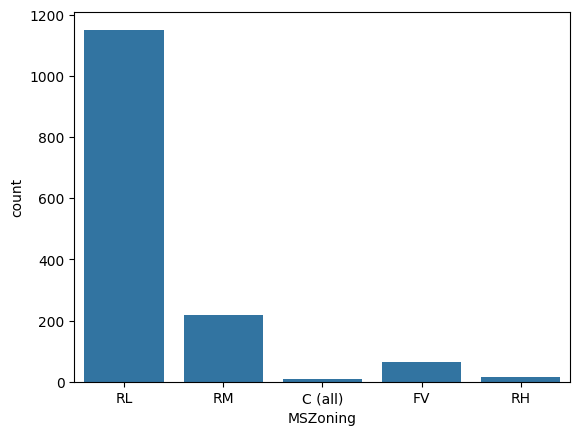

In [54]:
sns.countplot(x=train_df['MSZoning'])

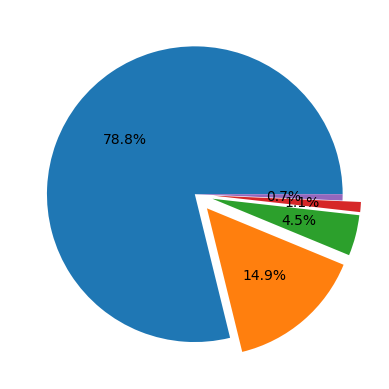

In [55]:
plt.pie(train_df['MSZoning'].value_counts(),autopct='%1.1f%%',explode=[0,0.126,0.123,0.125,0])
plt.show()

In [56]:
# sns.histplot(train_df['LotArea'],kde=True, bins=30)
# plt.show()

In [57]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
33,RL,Grvl,NAmes,1Story,BrkFace,TA,GasA,Gd,Y,SBrkr,1,Gd,6,1,Attchd,447,0,MnPrv,1,52760,51,165500
1083,RL,Grvl,NAmes,1Story,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,6,2,Attchd,461,0,MnPrv,2,52800,42,160000
442,RM,Grvl,BrkSide,1.5Fin,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,8,1,Detchd,360,0,MnPrv,2,31200,16,162900


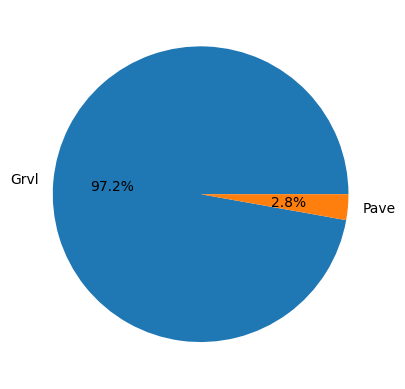

Alley
Grvl    1419
Pave      41
Name: count, dtype: int64

In [58]:
labels=['Grvl','Pave']
plt.pie(train_df['Alley'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()
train_df['Alley'].value_counts()

In [59]:
train_df['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

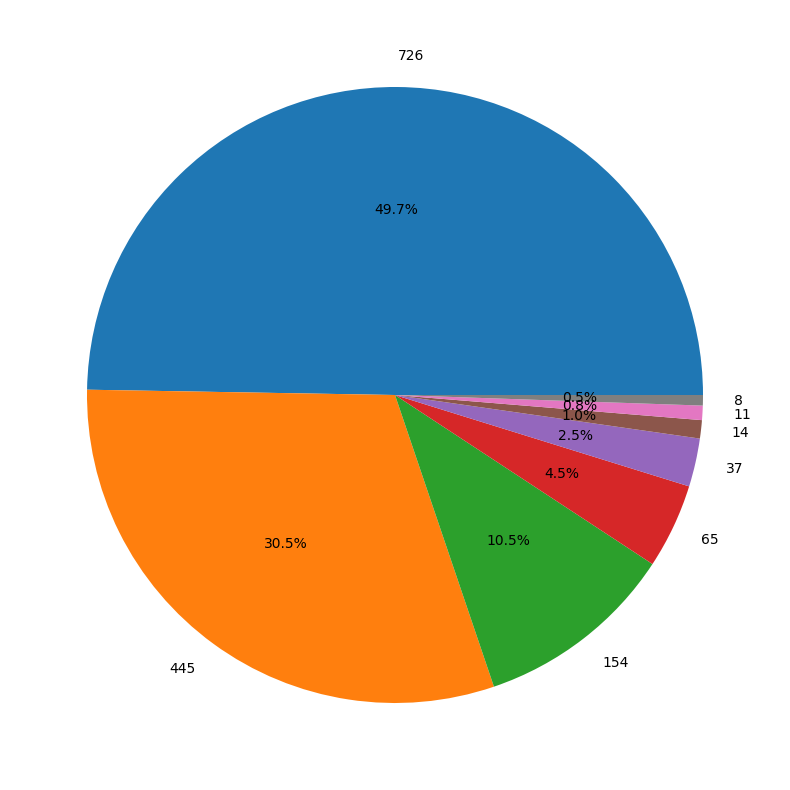

In [60]:
labels=train_df['HouseStyle'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(train_df['HouseStyle'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()

In [61]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
680,RL,Grvl,SawyerW,1Story,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,5,1,Attchd,264,0,MnPrv,2,48072,30,143000
1276,RL,Grvl,NWAmes,2Story,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,6,1,Attchd,497,0,MnPrv,1,77616,37,162000
88,C (all),Grvl,IDOTRR,1.5Fin,BrkFace,Fa,GasA,TA,N,SBrkr,1,Fa,6,0,Attchd,0,0,MnPrv,1,25410,27,85000


In [62]:
train_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

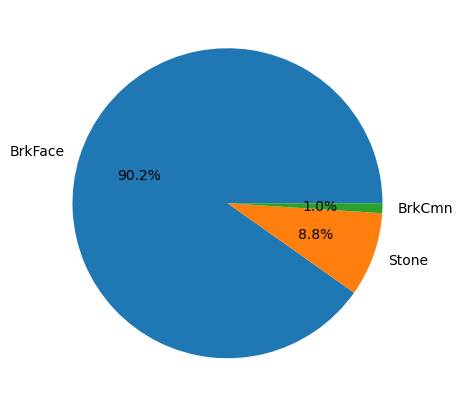

In [63]:
labels=['BrkFace','Stone','BrkCmn']
plt.figure(figsize=(5,6))
plt.pie(train_df['MasVnrType'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()

In [64]:
train_df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

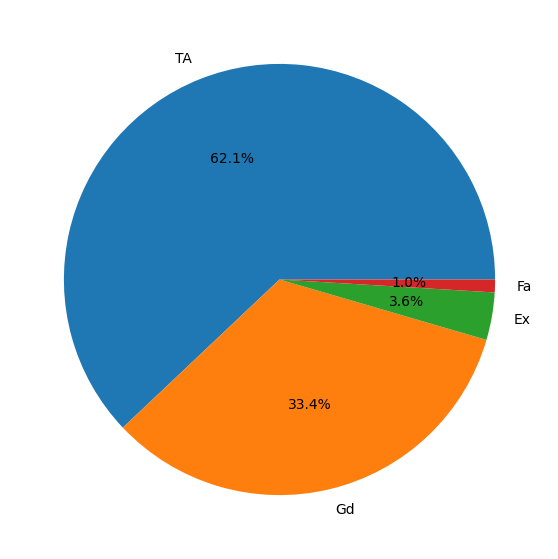

In [65]:
size=train_df['ExterQual'].value_counts()
labels=size.index
plt.figure(figsize=(7,7))
plt.pie(train_df['ExterQual'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()

In [66]:
train_df['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

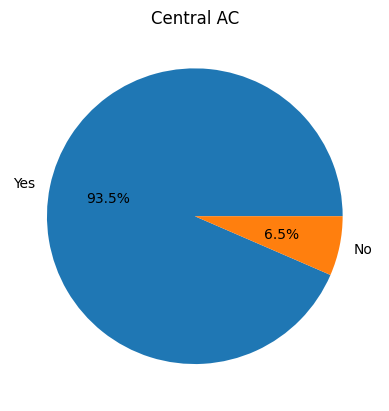

In [67]:
lab=['Yes','No']
plt.pie(train_df['CentralAir'].value_counts(),autopct='%1.1f%%',labels=lab)
plt.title('Central AC')
plt.show()

In [68]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
1177,RM,Grvl,OldTown,1.5Fin,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,5,0,Detchd,210,0,MnPrv,1,23700,5,115000
750,RM,Grvl,OldTown,1.5Fin,BrkFace,TA,GasA,Gd,Y,SBrkr,1,TA,7,0,Attchd,0,0,MnPrv,1,35200,6,96500
939,RL,Grvl,ClearCr,2Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,TA,10,2,Attchd,349,0,MnPrv,2,168630,60,244400


In [69]:
train_df['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

<Axes: xlabel='Electrical', ylabel='count'>

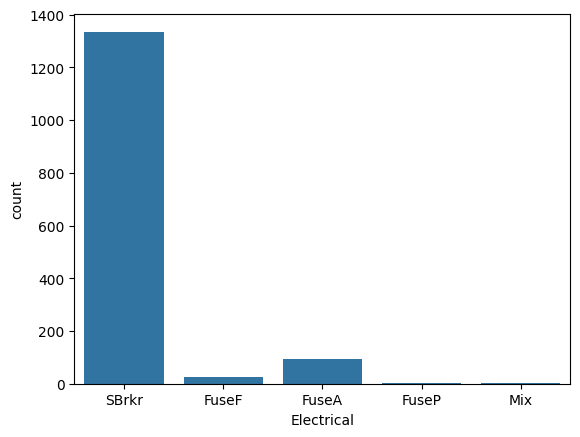

In [70]:
sns.countplot(x=train_df['Electrical'])

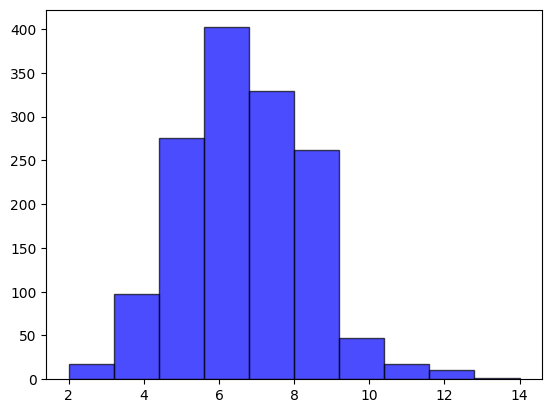

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [71]:
plt.hist(train_df['TotRmsAbvGrd'], color='blue',edgecolor='black', alpha=0.7)
plt.show()
train_df['TotRmsAbvGrd'].value_counts()

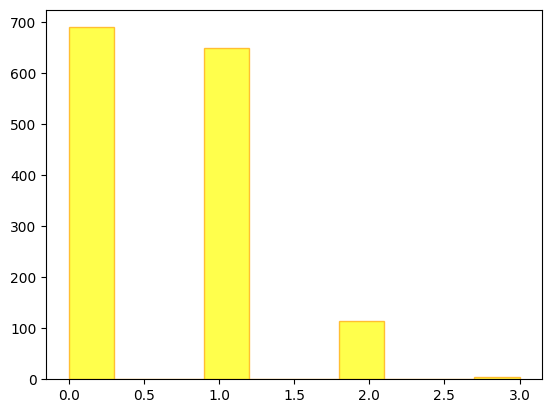

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [72]:
plt.hist(train_df['Fireplaces'],color='yellow',edgecolor='orange', alpha=0.7)
plt.show()
train_df['Fireplaces'].value_counts()

In [73]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
320,RL,Grvl,NridgHt,2Story,Stone,TA,GasA,Ex,Y,SBrkr,1,Gd,9,0,Attchd,840,0,MnPrv,3,146331,0,342643
701,RL,Grvl,NWAmes,1Story,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,6,0,Attchd,528,0,MnPrv,1,67200,37,140000
466,RL,Grvl,NAmes,1Story,BrkFace,TA,GasA,TA,Y,SBrkr,1,TA,5,1,Attchd,526,0,GdWo,2,74396,37,167000


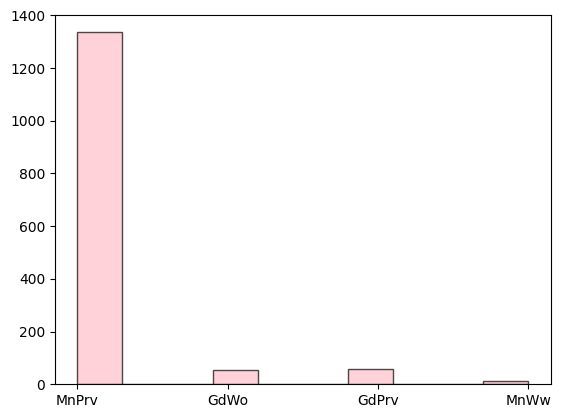

Fence
MnPrv    1336
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [74]:
plt.hist(train_df['Fence'],color='pink',edgecolor='black', alpha=0.7)
plt.show()
train_df['Fence'].value_counts()

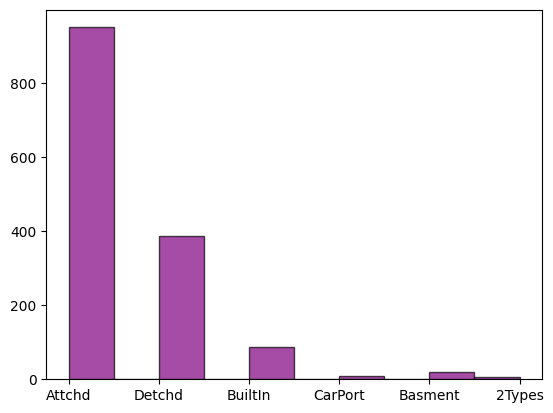

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [75]:
plt.hist(train_df['GarageType'],color='purple',edgecolor='black', alpha=0.7)
plt.show()
train_df['GarageType'].value_counts()

In [76]:
# BIVARIATE ANALYSIS

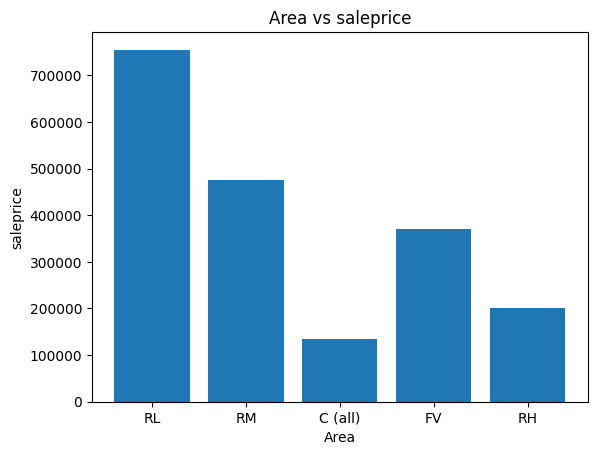

In [77]:
plt.bar(train_df['MSZoning'],train_df['SalePrice'])
plt.title('Area vs saleprice')
plt.xlabel('Area')
plt.ylabel('saleprice')
plt.show()

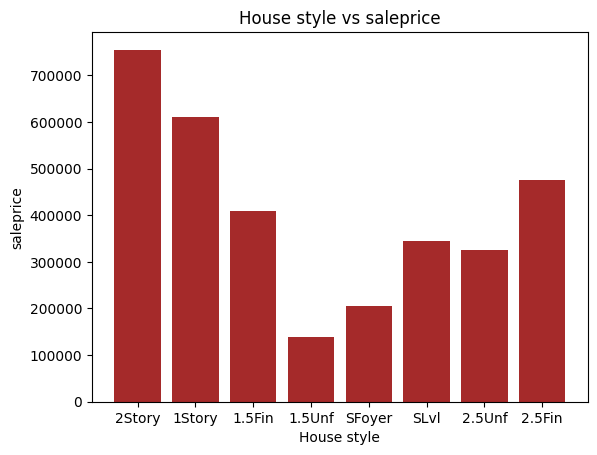

In [78]:
plt.bar(train_df['HouseStyle'],train_df['SalePrice'],color='brown')
plt.title('House style vs saleprice')
plt.xlabel('House style')
plt.ylabel('saleprice')
plt.show()

In [79]:
train_df.sample(2)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
778,RH,Grvl,SawyerW,1Story,BrkFace,TA,GasA,TA,Y,SBrkr,2,TA,10,2,Detchd,630,0,MnPrv,2,42000,30,144000
1029,RM,Grvl,BrDale,2Story,BrkFace,TA,GasA,Gd,Y,SBrkr,1,TA,7,0,Detchd,264,0,MnPrv,1,10080,34,118000


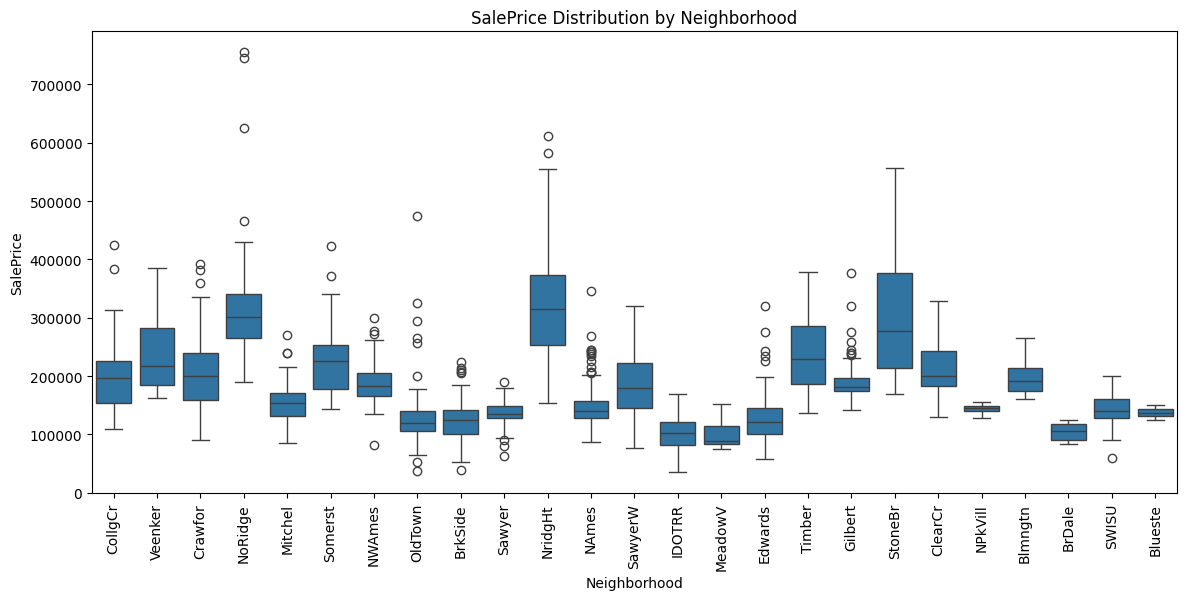

In [80]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title("SalePrice Distribution by Neighborhood")
plt.show()

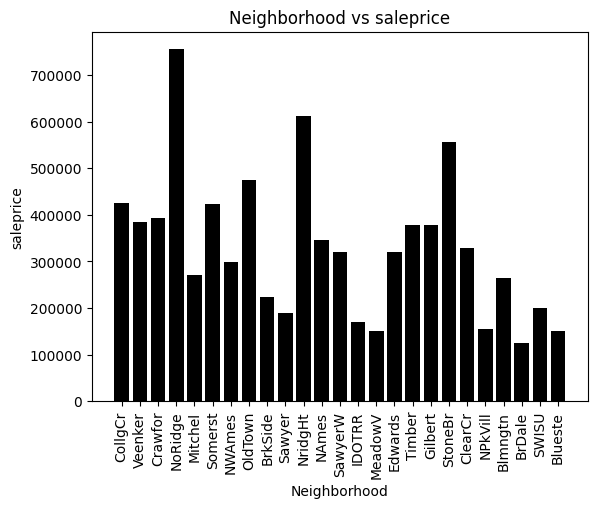

In [81]:
plt.bar(train_df['Neighborhood'],train_df['SalePrice'],color='black')
plt.title('Neighborhood vs saleprice')
plt.xlabel('Neighborhood')
plt.ylabel('saleprice')
plt.xticks(rotation=90)
plt.show()

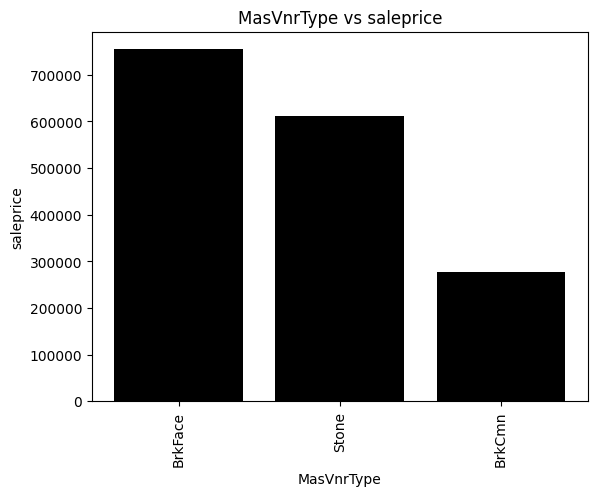

In [82]:
plt.bar(train_df['MasVnrType'],train_df['SalePrice'],color='black')
plt.title('MasVnrType vs saleprice')
plt.xlabel('MasVnrType')
plt.ylabel('saleprice')
plt.xticks(rotation=90)
plt.show()

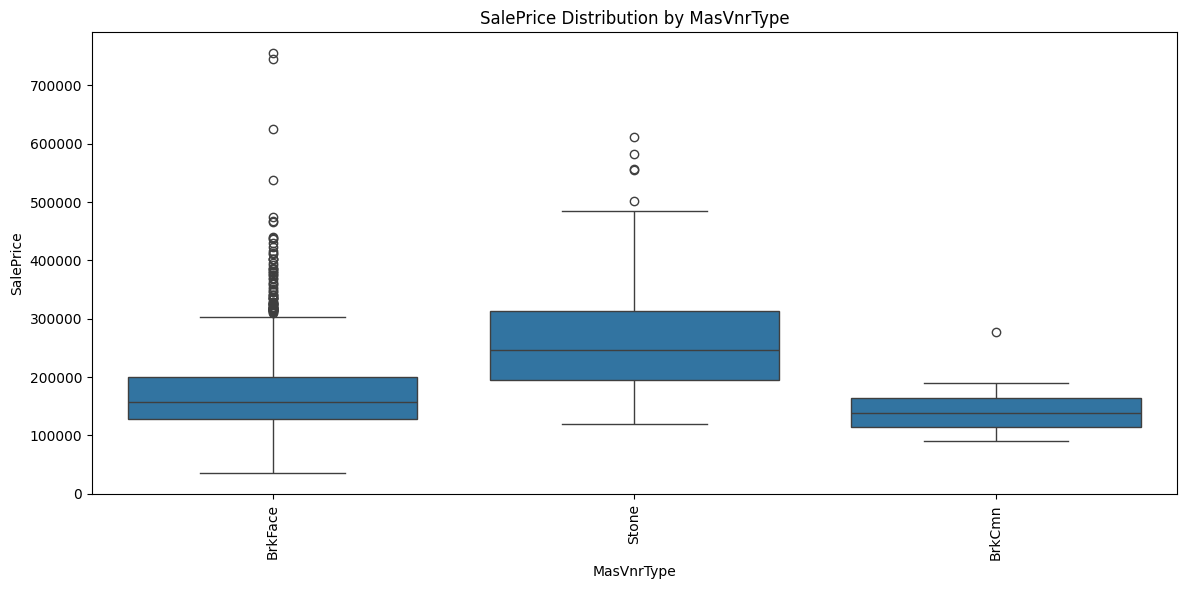

In [83]:
plt.figure(figsize=(14,6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title("SalePrice Distribution by MasVnrType")
plt.show()

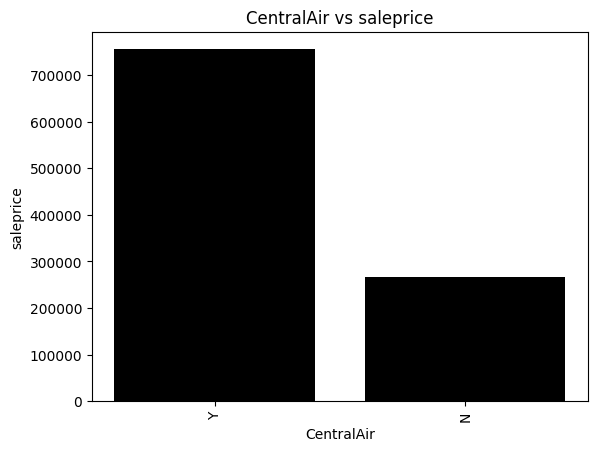

In [84]:
plt.bar(train_df['CentralAir'],train_df['SalePrice'],color='black')
plt.title('CentralAir vs saleprice')
plt.xlabel('CentralAir')
plt.ylabel('saleprice')
plt.xticks(rotation=90)
plt.show()

In [85]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='LotArea', y='SalePrice', data=train_df)
# plt.title('LotArea vs SalePrice')
# plt.show()


In [86]:
# plt.figure(figsize=(8,5))
# sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
# plt.title('OverallQual vs SalePrice')
# plt.show()


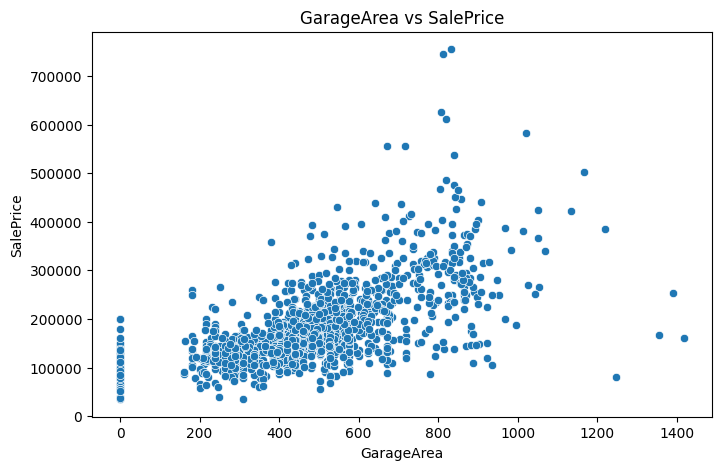

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_df)
plt.title('GarageArea vs SalePrice')
plt.show()


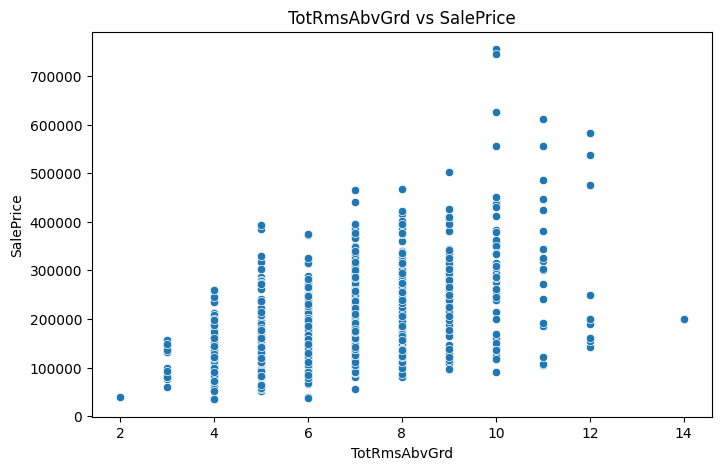

In [88]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df)
plt.title('TotRmsAbvGrd vs SalePrice')
plt.show()


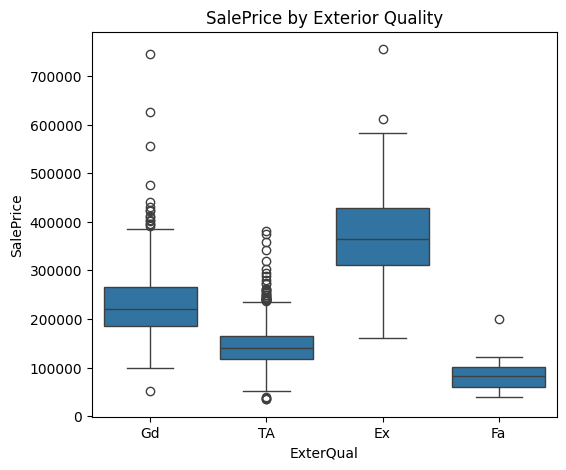

In [89]:
plt.figure(figsize=(6,5))
sns.boxplot(x='ExterQual', y='SalePrice', data=train_df)
plt.title('SalePrice by Exterior Quality')
plt.show()


In [90]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
483,RM,Grvl,Mitchel,1Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,TA,5,0,Attchd,402,0,MnPrv,3,27000,8,164000
796,RL,Grvl,Sawyer,1Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,TA,7,1,Attchd,528,0,MnPrv,1,49182,30,143500
671,RH,Grvl,Edwards,2Story,BrkFace,TA,GasA,TA,N,SBrkr,1,TA,6,0,Detchd,300,0,MnPrv,3,39774,59,103600


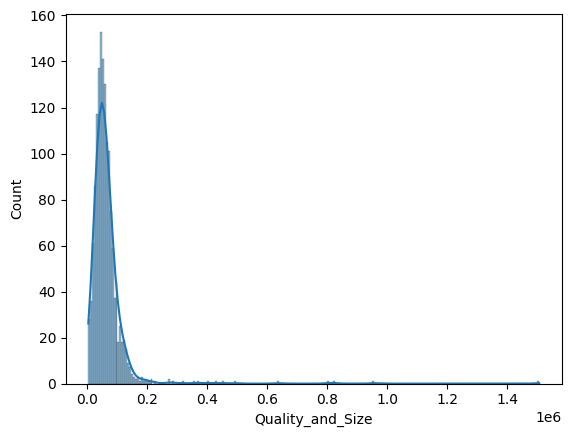

In [91]:
sns.histplot(train_df['Quality_and_Size'],kde=True)
plt.show()

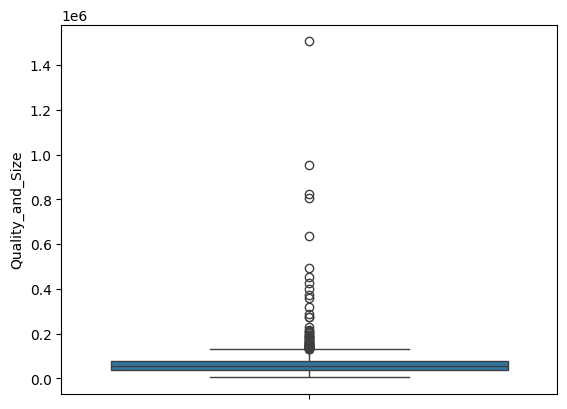

In [92]:
sns.boxplot(train_df['Quality_and_Size'])
plt.show()

In [93]:
train_df['Quality_and_Size'].describe()

count    1.460000e+03
mean     6.560500e+04
std      6.807189e+04
min      5.000000e+03
25%      3.938175e+04
50%      5.481700e+04
75%      7.621800e+04
max      1.506715e+06
Name: Quality_and_Size, dtype: float64

In [94]:
train_df['Quality_and_Size'].skew()

np.float64(11.055312123157265)

In [95]:
percentile25 = train_df['Quality_and_Size'].quantile(0.25)
percentile75 = train_df['Quality_and_Size'].quantile(0.75)
percentile75

np.float64(76218.0)

In [96]:
percentile75

np.float64(76218.0)

In [97]:
iqr = percentile75 - percentile25
iqr

np.float64(36836.25)

In [98]:
upper_limit=percentile75+1.5*iqr
upper_limit

np.float64(131472.375)

In [99]:
lower_limit=percentile25-1.5*iqr
lower_limit

np.float64(-15872.625)

In [100]:
# finding outliers
train_df[train_df['Quality_and_Size']>upper_limit].shape

(59, 22)

In [101]:
train_df[train_df['Quality_and_Size']<lower_limit].shape

(0, 22)

In [102]:
# more rows so need capping
tdfcap=train_df.copy()

In [103]:
tdfcap['Quality_and_Size']=np.where(tdfcap['Quality_and_Size']>upper_limit,upper_limit,np.where(tdfcap['Quality_and_Size']<lower_limit,lower_limit,tdfcap['Quality_and_Size']))

In [104]:
train_df['Quality_and_Size'].max()

np.int64(1506715)

In [105]:
tdfcap['Quality_and_Size'].max()

np.float64(131472.375)

In [106]:
print("Max before capping:", train_df['Quality_and_Size'].max())
print("Max after capping:", tdfcap['Quality_and_Size'].max())
print("Number of capped values:", (train_df['Quality_and_Size'] > upper_limit).sum())

Max before capping: 1506715
Max after capping: 131472.375
Number of capped values: 59


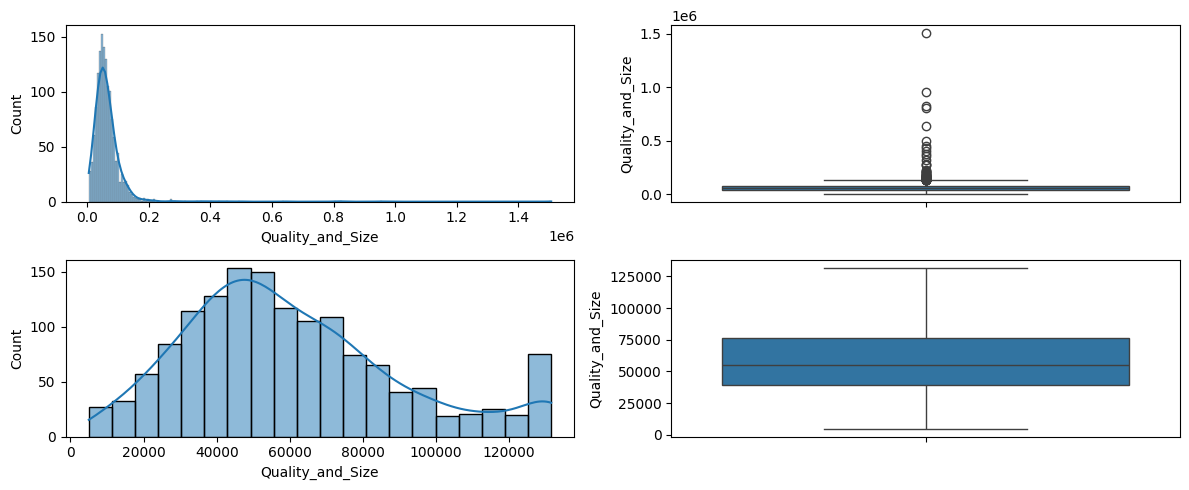

In [107]:
# Comparing
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.histplot(train_df['Quality_and_Size'],kde=True, ax=axes[0,0])
sns.boxplot(train_df['Quality_and_Size'], ax=axes[0,1])
sns.histplot(tdfcap['Quality_and_Size'],kde=True,ax=axes[1,0])
sns.boxplot(tdfcap['Quality_and_Size'], ax=axes[1,1])
plt.tight_layout() # This helps prevent overlap
plt.show()

In [108]:
train_df['Quality_and_Size']=tdfcap['Quality_and_Size']

In [109]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
1409,RL,Grvl,NWAmes,2Story,BrkFace,TA,GasA,Gd,Y,SBrkr,1,TA,7,1,Attchd,542,0,MnPrv,2,131472.375,17,215000
473,RL,Grvl,NridgHt,1Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,7,1,Attchd,908,0,MnPrv,3,119816.000,0,440000
1302,RL,Grvl,NoRidge,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,8,1,Attchd,844,0,MnPrv,3,80960.000,12,290000


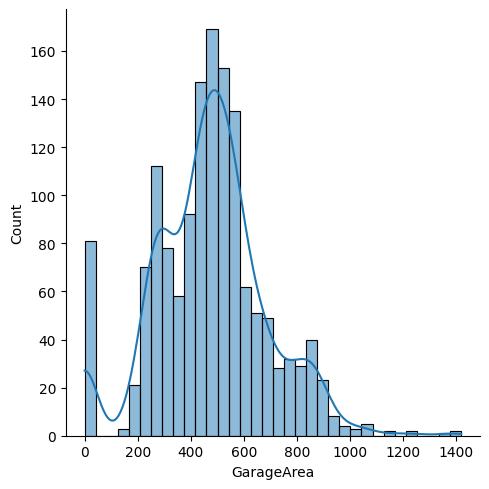

In [110]:
sns.displot(train_df['GarageArea'],kde=True)
plt.show()

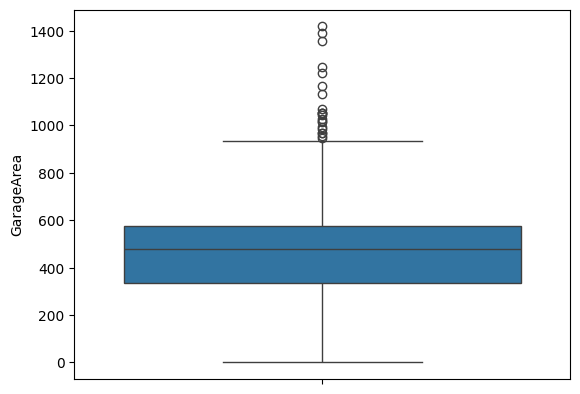

In [111]:
sns.boxplot(train_df['GarageArea'])
plt.show()

In [112]:
print("Skewness:", train_df['GarageArea'].skew())

Skewness: 0.17998090674623907


In [113]:
train_df.sample(2)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
670,RL,Grvl,CollgCr,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,7,0,Attchd,540,0,MnPrv,3,51798.0,4,173500
1000,RL,Grvl,Edwards,1Story,BrkFace,TA,GasW,Fa,N,FuseF,1,Fa,4,0,Detchd,528,0,MnPrv,1,30618.0,57,82000


In [114]:
train_df['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [115]:
percent25 = train_df['GarageArea'].quantile(0.25)
percent75 = train_df['GarageArea'].quantile(0.75)
percent25

np.float64(334.5)

In [116]:
percent75

np.float64(576.0)

In [117]:
iqr1=percent75-percent25
iqr1

np.float64(241.5)

In [118]:
upp_lim=percent75+1.5*iqr1
upp_lim

np.float64(938.25)

In [119]:
low_lim=percent25-1.5*iqr1
low_lim

np.float64(-27.75)

In [120]:
train_df[train_df['GarageArea']>upp_lim].shape

(21, 22)

In [121]:
train_df[train_df['GarageArea']<low_lim].shape

(0, 22)

In [122]:
cap1=train_df.copy()

In [123]:
cap1['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [124]:
cap1['GarageArea']=np.where(cap1['GarageArea']>upp_lim,upp_lim,cap1['GarageArea'])

In [125]:
print("Max before capping:", train_df['GarageArea'].max())
print("Max after capping:", cap1['GarageArea'].max())
print("Number of capped values:", (train_df['GarageArea'] > upp_lim).sum())

Max before capping: 1418
Max after capping: 938.25
Number of capped values: 21


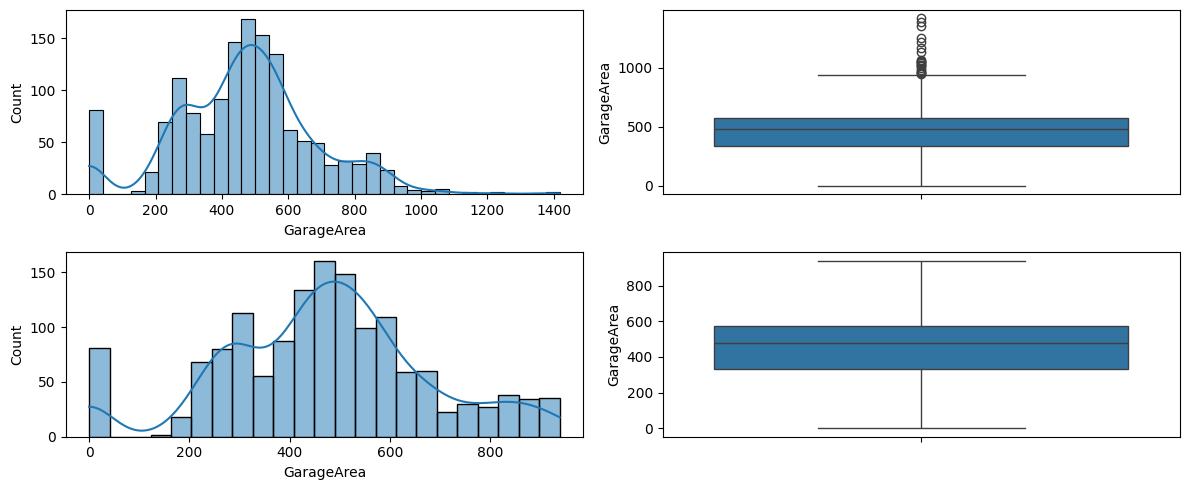

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.histplot(train_df['GarageArea'],kde=True, ax=axes[0,0])
sns.boxplot(train_df['GarageArea'], ax=axes[0,1])
sns.histplot(cap1['GarageArea'],kde=True,ax=axes[1,0])
sns.boxplot(cap1['GarageArea'], ax=axes[1,1])
plt.tight_layout() # This helps prevent overlap
plt.show()

In [127]:
train_df['GarageArea']=cap1['GarageArea']

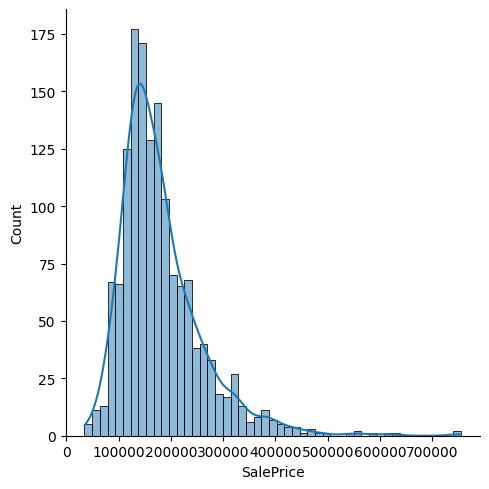

In [128]:
sns.displot(train_df['SalePrice'],kde=True)
plt.show()

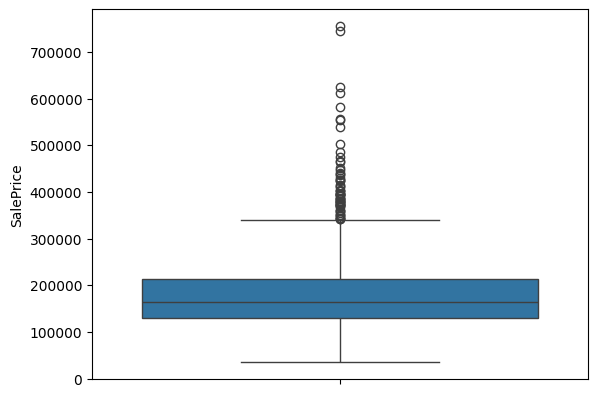

In [129]:
sns.boxplot(train_df['SalePrice'])
plt.show()

In [130]:
print("Skewness:", train_df['SalePrice'].skew())

Skewness: 1.8828757597682129


In [131]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [132]:
pst25 = train_df['SalePrice'].quantile(0.25)
pst75 = train_df['SalePrice'].quantile(0.75)

In [133]:
iqrs=pst75-pst25

In [134]:
us_lim=pst75+1.5*iqrs
ls_lim=pst25-1.5*iqrs

In [135]:
train_df[train_df['SalePrice']>us_lim].shape

(61, 22)

In [136]:
train_df[train_df['SalePrice']<ls_lim].shape

(0, 22)

In [137]:
salecap=train_df.copy()

In [138]:
salecap['SalePrice']=np.where(salecap['SalePrice']>us_lim,us_lim,salecap['SalePrice'])

In [139]:
print("Max before capping:", train_df['SalePrice'].max())
print("Max after capping:", salecap['SalePrice'].max())
print("Number of capped values:", (train_df['SalePrice'] > us_lim).sum())

Max before capping: 755000
Max after capping: 340037.5
Number of capped values: 61


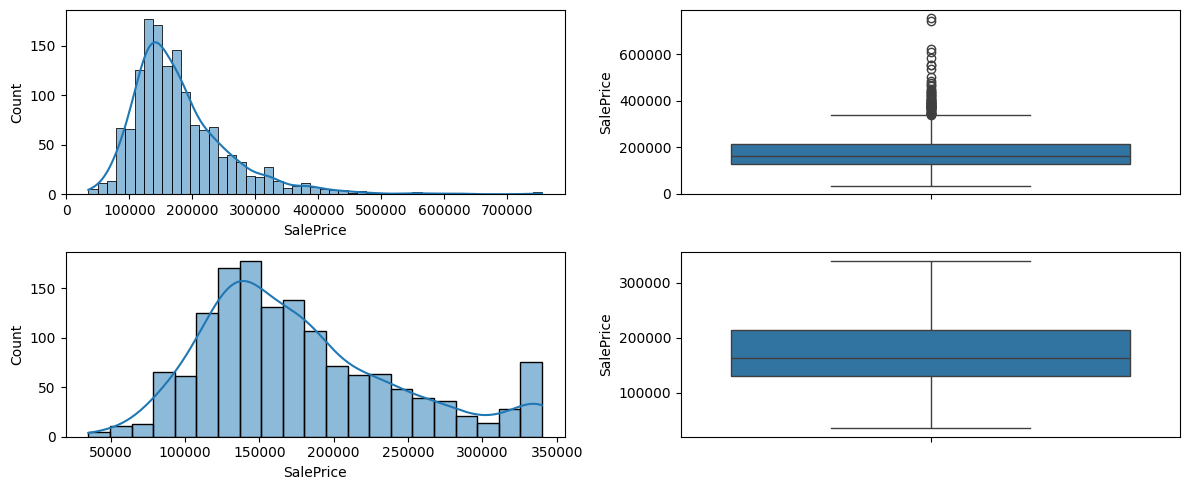

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.histplot(train_df['SalePrice'],kde=True, ax=axes[0,0])
sns.boxplot(train_df['SalePrice'], ax=axes[0,1])
sns.histplot(salecap['SalePrice'],kde=True,ax=axes[1,0])
sns.boxplot(salecap['SalePrice'], ax=axes[1,1])
plt.tight_layout() # This helps prevent overlap
plt.show()

In [141]:
train_df['SalePrice']=salecap['SalePrice']

In [142]:
train_df.sample(3)

,MSZoning,Alley,Neighborhood,HouseStyle,MasVnrType,ExterQual,Heating,HeatingQC,CentralAir,Electrical,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,PoolArea,Fence,TotalBath,Quality_and_Size,House_Age,SalePrice
773,RL,Grvl,NAmes,1Story,BrkFace,TA,GasA,Ex,Y,FuseA,1,TA,5,0,Attchd,275.0,0,MnPrv,1,50750.0,49,114500.0
212,FV,Grvl,Somerst,2Story,BrkFace,TA,GasA,Ex,Y,SBrkr,1,Gd,7,1,Attchd,644.0,0,MnPrv,3,60480.0,0,252678.0
168,RL,Grvl,Gilbert,2Story,BrkFace,Gd,GasA,Ex,Y,SBrkr,1,Gd,7,1,Attchd,440.0,0,MnPrv,2,57708.0,3,183500.0


In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [144]:
train_df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [145]:
train_df['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [146]:
train_df['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [147]:
ordinal_quality = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [148]:
# encoding
nominal_cols=['MSZoning', 'Alley', 'Neighborhood', 'HouseStyle',
    'MasVnrType', 'Heating', 'Electrical','CentralAir',
    'GarageType', 'Fence']
ordinal_cols = [
    'ExterQual', 'KitchenQual', 'HeatingQC'
]
ordinal_categories = [ordinal_quality, ordinal_quality,ordinal_quality]
from sklearn.preprocessing import StandardScaler
columns_to_scale = [ 'GarageArea', 'PoolArea', 'Quality_and_Size', 'TotalBath',
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']

In [149]:
# column transformer used so that can apply different encoders on diiff collumns at same time
ct=ColumnTransformer(transformers=[
    ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore'),nominal_cols),
    ('ordinal',OrdinalEncoder(categories=ordinal_categories),ordinal_cols),
    ('scaler', StandardScaler(), columns_to_scale)
],remainder='passthrough')

In [150]:
X=train_df.drop('SalePrice',axis=1)
X.shape

(1460, 21)

In [151]:
y=train_df['SalePrice']
y.shape

(1460,)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [154]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 21)
(1168,)
(292, 21)
(292,)


In [155]:
X_train_transform=ct.fit_transform(X_train)

In [156]:
X_test_transform=ct.transform(X_test)

C:\Users\hp5cd\anaconda3\envs\profiling-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model=LinearRegression()

In [159]:
model.fit(X_train_transform,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [160]:
y_pred=model.predict(X_test_transform)

In [161]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MEAN SQUARED ERROR:",mse)

MEAN SQUARED ERROR: 610580941.604765


In [162]:
mae = mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR:",mae)

MEAN ABSOLUTE ERROR: 18588.487937872185


In [163]:
rs = r2_score(y_test, y_pred)
print("R2_SCORE:",rs)

R2_SCORE: 0.8751176672325284


In [164]:
rmse = root_mean_squared_error(y_test, y_pred)
print("ROOT MEAN SQUARED ERROR:",rmse)

ROOT MEAN SQUARED ERROR: 24709.93609066533


In [165]:
y_pred_train = model.predict(X_train_transform)

In [166]:
r2_train = r2_score(y_train, y_pred_train)
r2_train     #good fit performs well on training dataset too

0.8623360191947719

In [167]:
# decision tree algorithm

In [168]:
# from sklearn.tree import DecisionTreeRegressor
# dt1=DecisionTreeRegressor()

In [169]:
# dt1.fit(X_train_transform,y_train)

In [170]:
# y_pred1=dt1.predict(X_test_transform)

In [171]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,root_mean_squared_error
# mse = mean_squared_error(y_test, y_pred1)
# print("MEAN SQUARED ERROR:",mse)
# mae = mean_absolute_error(y_test, y_pred1)
# print("MEAN ABSOLUTE ERROR:",mae)
# rs_test = r2_score(y_test, y_pred1)
# print("R2_SCORE_test:",rs)
# rmse = root_mean_squared_error(y_test, y_pred1)
# print("ROOT MEAN SQUARED ERROR:",rmse)
# r2_train = r2_score(y_train, y_pred_train)
# print("R2_SCORE training:",r2_train)

In [172]:
# random forest regressor

In [173]:
# from sklearn.ensemble import RandomForestRegressor

In [174]:
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_transform, y_train)

In [175]:
# y_pred_rf = rf_model.predict(X_test_transform)

In [176]:
# mse = mean_squared_error(y_test, y_pred_rf)
# print("MEAN SQUARED ERROR:",mse)
# mae = mean_absolute_error(y_test, y_pred_rf)
# print("MEAN ABSOLUTE ERROR:",mae)
# rs_test = r2_score(y_test, y_pred_rf)
# print("R2_SCORE_test:",rs)
# rmse = root_mean_squared_error(y_test, y_pred_rf)
# print("ROOT MEAN SQUARED ERROR:",rmse)

In [177]:
X_test_final = ct.transform(test_df)

In [178]:
y_pred_final = model.predict(X_test_final)

In [179]:
y_pred_final.min()

np.float64(43536.38070331581)

In [180]:
predictions_df = pd.DataFrame(y_pred_final, columns=['SalePrice'])
predictions_df

,SalePrice
0,148065.854596
1,151812.345685
2,170848.739982
3,183775.009005
4,216999.163252
...,...
1454,67772.297986
1455,62917.381167
1456,188954.149407
1457,110956.111737


In [181]:
predictions_df['Id'] = test_df.index + 1 
predictions_df = predictions_df[['Id', 'SalePrice']]

In [182]:
predictions_df

,Id,SalePrice
0,1,148065.854596
1,2,151812.345685
2,3,170848.739982
3,4,183775.009005
4,5,216999.163252
...,...,...
1454,1455,67772.297986
1455,1456,62917.381167
1456,1457,188954.149407
1457,1458,110956.111737


In [183]:
predictions_df.to_csv('house_price_predictions_final.csv', index=False)

print("Predictions saved to 'house_price_predictions_final.csv'")
print(predictions_df.head())

Predictions saved to 'house_price_predictions_final.csv'
   Id      SalePrice
0   1  148065.854596
1   2  151812.345685
2   3  170848.739982
3   4  183775.009005
4   5  216999.163252
